### Import Libraries

In [1]:
import pandas as pd

### Load the dataset

In [2]:
df = pd.read_csv('./datasets/household_power_consumption.txt', delimiter=';', low_memory=False)

### Grab time series of electricity usage

In [3]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['electricity_usage'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['date_time', 'electricity_usage']].copy()

/var/tmp/ipykernel_31756/1437528521.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


### Set the index as and sort by date and time

In [4]:
df = df.set_index('date_time').sort_index()

### Resample to hourly frequency

In [5]:
df_hour = df.resample('1H').mean()

### Create shifted time series

In [6]:
df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')
df_hour['electricity_usage_1hr_lag'] = df_hour['electricity_usage'].shift()
df_hour['electricity_usage_2hr_lag'] = df_hour['electricity_usage'].shift(2)
df_hour['electricity_usage_3hr_lag'] = df_hour['electricity_usage'].shift(3)
df_hour['electricity_usage_4hr_lag'] = df_hour['electricity_usage'].shift(4)
df_hour['electricity_usage_5hr_lag'] = df_hour['electricity_usage'].shift(5)
df_hour['electricity_usage_6hr_lag'] = df_hour['electricity_usage'].shift(6)
df_hour['electricity_usage_7hr_lag'] = df_hour['electricity_usage'].shift(7)
df_hour['electricity_usage_8hr_lag'] = df_hour['electricity_usage'].shift(8)

### Create month/seasonality as a feature

In [7]:
df_hour['month'] = df_hour.index.month

### Drop missing data

In [8]:
df_hour = df_hour.dropna()

### Split train test sets

In [9]:
sample_size = df_hour.shape[0] - 200
df_train = df_hour.iloc[:sample_size].copy()
df_test = df_hour.iloc[sample_size:].copy()

In [10]:
df_train.head()

,electricity_usage,electricity_usage_1hr_lag,electricity_usage_2hr_lag,electricity_usage_3hr_lag,electricity_usage_4hr_lag,electricity_usage_5hr_lag,electricity_usage_6hr_lag,electricity_usage_7hr_lag,electricity_usage_8hr_lag,month
date_time,,,,,,,,,,
2006-12-17 01:00:00,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,4.222889,12
2006-12-17 02:00:00,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,12
2006-12-17 03:00:00,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,12
2006-12-17 04:00:00,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,12
2006-12-17 05:00:00,1.996733,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,12


<hr>

### Install Java depedencies

In [13]:
!java -version

/bin/bash: line 1: java: command not found


In [15]:
!sudo apt-get install openjdk-11-jre-headless -qq > /dev/null

In [16]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

<hr>

### Import H2O

In [17]:
%pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [18]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Debian-1deb11u1); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Debian-1deb11u1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/tmp/tmpl2jg2kcr
  JVM stdout: /var/tmp/tmpl2jg2kcr/h2o_jupyter_started_from_python.out
  JVM stderr: /var/tmp/tmpl2jg2kcr/h2o_jupyter_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_jupyter_x5gw8z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.867 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Convert pandas dataframe to h2o dataframe

In [19]:
h2o_frame = h2o.H2OFrame(df_train)
x = h2o_frame.columns
y = 'electricity_usage'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### Automate supervised ML traning model

In [20]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=666)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/12
# GBM base models (used / total),5/5
# XGBoost base models (used / total),1/3
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


### Print out leader board of ML training models

In [21]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_2_AutoML_1_20231224_170659,0.345125,0.587473,0.400099,0.243287,0.345125,3315,0.076976,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20231224_170659,0.345141,0.587487,0.399949,0.243279,0.345141,1488,0.075385,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20231224_170659,0.345259,0.587588,0.400264,0.243273,0.345259,1037,0.075211,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20231224_170659,0.345702,0.587964,0.400767,0.243609,0.345702,1651,0.029357,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20231224_170659,0.346032,0.588245,0.401501,0.2437,0.346032,987,0.023514,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20231224_170659,0.346605,0.588731,0.402424,0.244064,0.346605,1010,0.019641,StackedEnsemble
GBM_1_AutoML_1_20231224_170659,0.346819,0.588913,0.402941,0.244293,0.346819,4024,0.015863,GBM
GBM_2_AutoML_1_20231224_170659,0.349653,0.591315,0.405638,0.245042,0.349653,2477,0.011883,GBM
GBM_5_AutoML_1_20231224_170659,0.35,0.591608,0.406766,0.245693,0.35,1525,0.00963,GBM
GBM_3_AutoML_1_20231224_170659,0.350491,0.592023,0.40581,0.245423,0.350491,1948,0.011344,GBM


### Metrics from Test datasets

In [22]:
from h2o.model.regression import h2o_mean_squared_error

h2o_frame_test = h2o.H2OFrame(df_test)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(df_test[['electricity_usage']])

h2o_mean_squared_error(y_actual, y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.35319887700661445

### Predicted v/s Actual data

/opt/conda/lib/python3.10/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


<Axes: xlabel='date_time'>

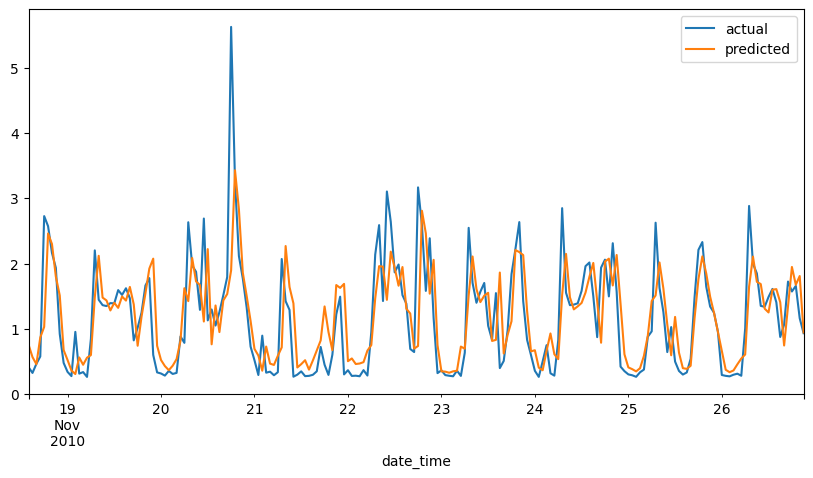

In [23]:
h2o_compare = pd.DataFrame(data={'actual': df_test['electricity_usage'], 'predicted': y_pred.as_data_frame().to_numpy().ravel()})
h2o_compare.plot(figsize=(10, 5))